# Предварительная обработка данных

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
RSEED = 50

In [4]:
# dfset upload
df = pd.read_csv("uber.csv")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
# information about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [6]:
# statistic description
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


1. Сумма тарифа находится в диапазоне от -52 до 499: отрицательной суммы быть не может. 
2. Максимальное количество пассажиров составляет 208, что также невозможно. Максимальное значение должно быть установлено на 5

In [7]:
# information about object features
df.describe(include='O')

,key,pickup_datetime
count,200000,200000
unique,200000,196629
top,2015-05-07 19:52:06.0000003,2014-04-13 18:19:00 UTC
freq,1,4


Имеем два категориальных признака. 
1. Столбцы **Unnamed: 0** и **key** удалим, поскольку они не информативны. 
2. Столбец **pickup_datetime** разделим на столбцы **day_of_the_week**, **hour**, **part_of_the_day**.

In [8]:
# column deletion 
df = df.drop(['Unnamed: 0', 'key'], axis = 1) 

In [9]:
# finding gaps
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [10]:
df[df.isna().any(axis=1)]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
87946,24.1,2013-07-02 03:51:57 UTC,-73.950581,40.779692,NaN,NaN,0


В ходе проверки было выявлено наличие двух пропусков в одной строке (87946). Исключим ее из набора данных.

In [11]:
df = df.dropna()

## Найдем дубликаты -- дубликатов не найдено

In [12]:
duplicate_rows = df[df.duplicated(df.columns)]
duplicate_rows

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


## Широта может иметь значения в диапазоне [-90 , 90], долгота соответственно [-180 , 180], количество пассажиров ограничим количеством 0 и 50, стоимость поездки не может быть неположительной

In [13]:
df = df[
    (-180 < df['pickup_longitude']) & (df['pickup_longitude'] < 180) &
    (-180 < df['dropoff_longitude']) & (df['dropoff_longitude'] < 180) &
    (-90 < df['pickup_latitude']) & (df['pickup_latitude'] < 90) &
    (-90 < df['dropoff_latitude']) & (df['dropoff_latitude'] < 90) &
    (df['passenger_count'] < 6) & (df['passenger_count'] > 0) &
    (df['fare_amount'] > 2)
]
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


## Исправленная предобработка данных в части дат и времени

In [14]:
from datetime import datetime
# Сначала приведем столбец к более удобному формату
df['pickup_datetime']  = pd.to_datetime(df['pickup_datetime'])

In [15]:
# df['day'] = pd.to_datetime(df['pickup_datetime']).dt.day
df['month'] = pd.to_datetime(df['pickup_datetime']).dt.month
df['year'] = pd.to_datetime(df['pickup_datetime']).dt.year
df['day_of_the_week'] = pd.to_datetime(df['pickup_datetime']).dt.day_name()
df['work_weekend'] = df.day_of_the_week.map({'Monday':'Workday', 'Tuesday':'Workday', 'Wednesday':'Workday', 'Thursday':'Workday', 'Friday':'Workday',
                                             'Saturday': 'Weekend', 'Sunday': 'Weekend'})
df['pickup_datetime'] = df['pickup_datetime'].astype(np.int64)
df['pickup_hour'] = pd.to_datetime(df['pickup_datetime']).dt.hour

df['part_of_the_day'] = df.pickup_hour.map({0:'night',1:'night',2:'morning',3:'morning',4:'morning',
                                                5:'morning',6:'morning', 7:'afternoon', 8:'afternoon',
                                                9:'afternoon',10:'afternoon',11:'afternoon',12:'afternoon',
                                                13:'afternoon', 14:'afternoon', 15:'evening', 16: 'evening',
                                                17:'evening', 18:'evening', 19:'night', 20:'night',
                                                21:'night', 22:'night', 23:'night'})
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,year,day_of_the_week,work_weekend,pickup_hour,part_of_the_day
0,7.5,1431028326000000000,-73.999817,40.738354,-73.999512,40.723217,1,5,2015,Thursday,Workday,19,night
1,7.7,1247861096000000000,-73.994355,40.728225,-73.994710,40.750325,1,7,2009,Friday,Workday,20,night
2,12.9,1251150300000000000,-74.005043,40.740770,-73.962565,40.772647,1,8,2009,Monday,Workday,21,night
3,5.3,1246004541000000000,-73.976124,40.790844,-73.965316,40.803349,3,6,2009,Friday,Workday,8,afternoon
4,16.0,1409248020000000000,-73.925023,40.744085,-73.973082,40.761247,5,8,2014,Thursday,Workday,17,evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,1351421340000000000,-73.987042,40.739367,-73.986525,40.740297,1,10,2012,Sunday,Weekend,10,afternoon
199996,7.5,1394759340000000000,-73.984722,40.736837,-74.006672,40.739620,1,3,2014,Friday,Workday,1,night
199997,30.9,1246236120000000000,-73.986017,40.756487,-73.858957,40.692588,2,6,2009,Monday,Workday,0,night
199998,14.5,1432133785000000000,-73.997124,40.725452,-73.983215,40.695415,1,5,2015,Wednesday,Workday,14,afternoon


In [16]:
# function to calculate the travel distance from the longitudes and latitudes
def haversine (lon_1, lon_2, lat_1, lat_2):
    lon_1, lon_2, lat_1, lat_2 = map(np.radians, [lon_1, lon_2, lat_1, lat_2])
    
    diff_lon = lon_2 - lon_1
    diff_lat = lat_2 - lat_1
    
    km = 2 * 6371 * np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2 + 
                                       np.cos(lat_1) * np.cos(lat_2) 
                                       * np.sin(diff_lon/2.0)**2) )
    return km

In [17]:
df['distance'] = haversine( df['pickup_longitude'],df['dropoff_longitude'],
                           df['pickup_latitude'],df['dropoff_latitude'] )

df['distance'] = df['distance'].astype(float).round(2) 

In [18]:
# column deletion 
df = df.drop(['pickup_longitude',	'pickup_latitude',	'dropoff_longitude', 'dropoff_latitude', 'day_of_the_week', 'pickup_hour', 'pickup_datetime'], axis = 1) 

In [19]:
# dataframe ready to go 
df.head() 

,fare_amount,passenger_count,month,year,work_weekend,part_of_the_day,distance
0,7.5,1,5,2015,Workday,night,1.68
1,7.7,1,7,2009,Workday,night,2.46
2,12.9,1,8,2009,Workday,night,5.04
3,5.3,3,6,2009,Workday,afternoon,1.66
4,16.0,5,8,2014,Workday,evening,4.48


# Визуализация признаков

C:\Users\Daniil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


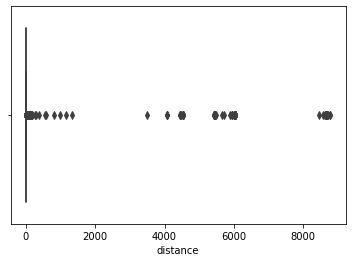

In [20]:
sns.boxplot(df['distance']);

## В столбце distance получилось очень много значений, больше 4000 (было бы странно оставлять такие значения)

In [21]:
df = df[(df['distance'] < 2000) & df['distance'] > 0.05]
df

,fare_amount,passenger_count,month,year,work_weekend,part_of_the_day,distance
0,7.5,1,5,2015,Workday,night,1.68
1,7.7,1,7,2009,Workday,night,2.46
2,12.9,1,8,2009,Workday,night,5.04
3,5.3,3,6,2009,Workday,afternoon,1.66
4,16.0,5,8,2014,Workday,evening,4.48
...,...,...,...,...,...,...,...
199995,3.0,1,10,2012,Weekend,afternoon,0.11
199996,7.5,1,3,2014,Workday,night,1.88
199997,30.9,2,6,2009,Workday,night,12.85
199998,14.5,1,5,2015,Workday,afternoon,3.54


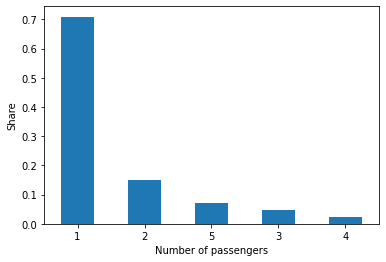

In [22]:
df['passenger_count'].value_counts(normalize = True).plot.bar()
plt.xticks(rotation = 0);
plt.xlabel('Number of passengers');
plt.ylabel('Share');

Наблюдение: 
1. Почти в 70% поездок был только 1 пассажир
2. Максимальное количество пассажиров может составлять 6 человек 
3. Выбросы: значения 0 и 208

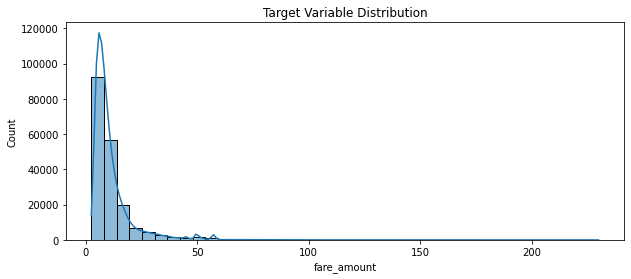

In [23]:
plt.figure(figsize=[10,4])
sns.histplot(data=df, x="fare_amount", bins=40, kde=True); 
plt.title('Target Variable Distribution');

Зависимость стоимости поездки от дистанции

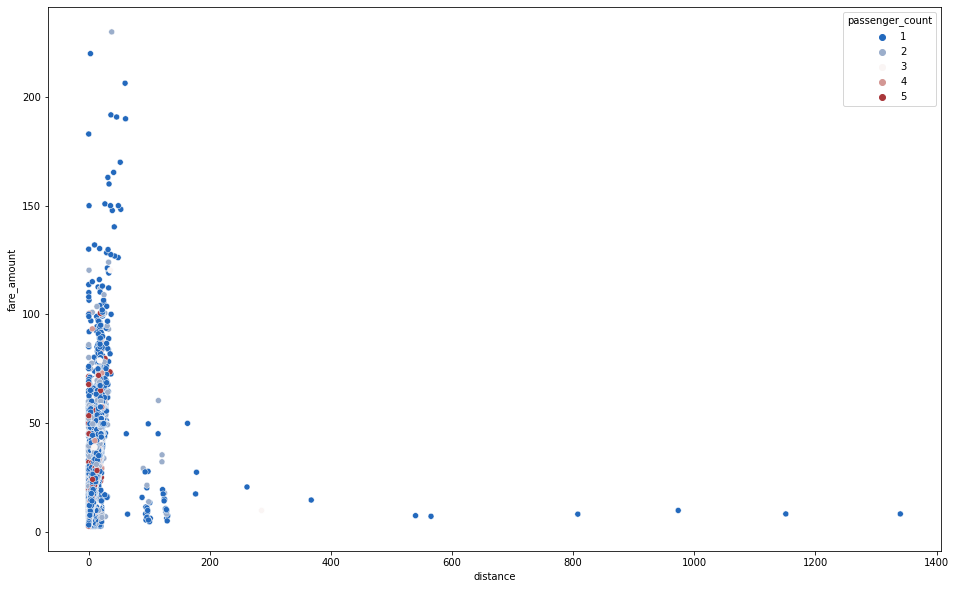

In [24]:
plt.subplots(figsize=(16,10))
sns.scatterplot(data=df, x='distance', y='fare_amount', hue='passenger_count', palette='vlag');

Видно, что есть поездки, с очень большой дистанцией, но с очень низкой стоимостью, и с высокой стоимостью за не очень дальние поездки. Ограничим эти значения

In [25]:
df = df.drop(
    df[(df['fare_amount'] > 75) & (df['distance'] < 5)].index
)
df = df.drop(
    df[(df['fare_amount'] < 75) & (df['distance'] > 40)].index
)
df

,fare_amount,passenger_count,month,year,work_weekend,part_of_the_day,distance
0,7.5,1,5,2015,Workday,night,1.68
1,7.7,1,7,2009,Workday,night,2.46
2,12.9,1,8,2009,Workday,night,5.04
3,5.3,3,6,2009,Workday,afternoon,1.66
4,16.0,5,8,2014,Workday,evening,4.48
...,...,...,...,...,...,...,...
199995,3.0,1,10,2012,Weekend,afternoon,0.11
199996,7.5,1,3,2014,Workday,night,1.88
199997,30.9,2,6,2009,Workday,night,12.85
199998,14.5,1,5,2015,Workday,afternoon,3.54


Выведем еще раз

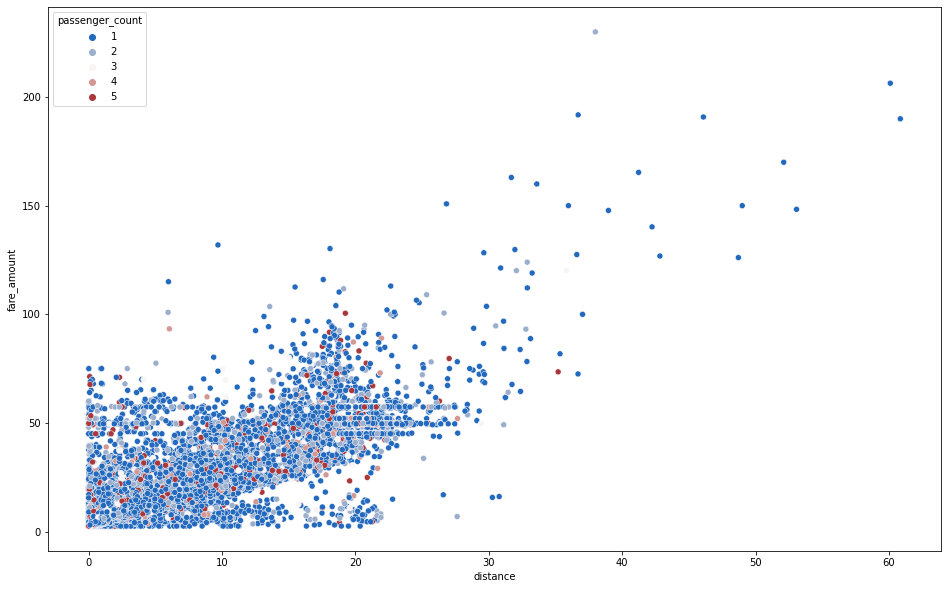

In [26]:
plt.subplots(figsize=(16,10))
sns.scatterplot(data=df, x='distance', y='fare_amount', hue='passenger_count', palette='vlag');

Снизу - чистое жулье. Из того ужасного распределения сверху получается конус нормальной зависимости снизу

In [27]:
df = df[(df['distance'] > 0) & (df['fare_amount'] < 6.7 * df['distance'])]
df = df[(df['distance'] > 0) & (df['fare_amount'] > 2 * df['distance'])]

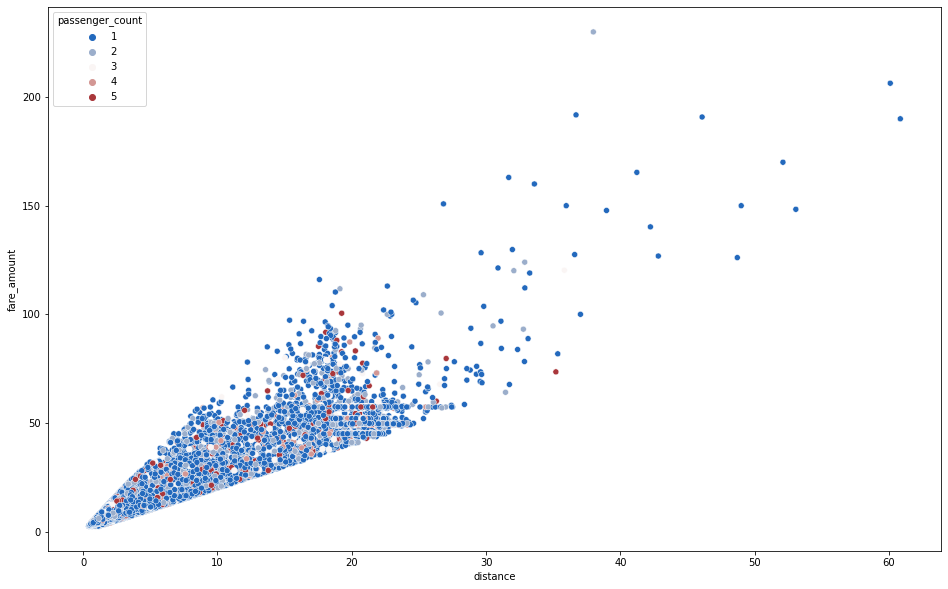

In [28]:
plt.subplots(figsize=(16,10))
sns.scatterplot(data=df, x='distance', y='fare_amount', hue='passenger_count', palette='vlag');

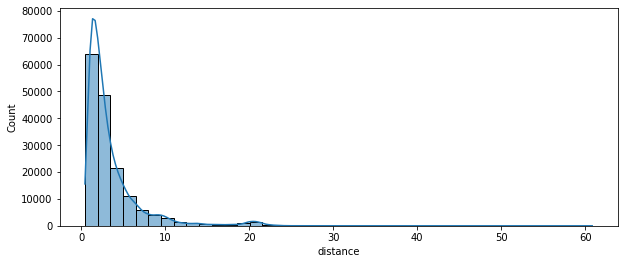

In [29]:
plt.figure(figsize=[10,4])
sns.histplot(data=df, x="distance", bins=40, kde=True); 

Наблюдение: 

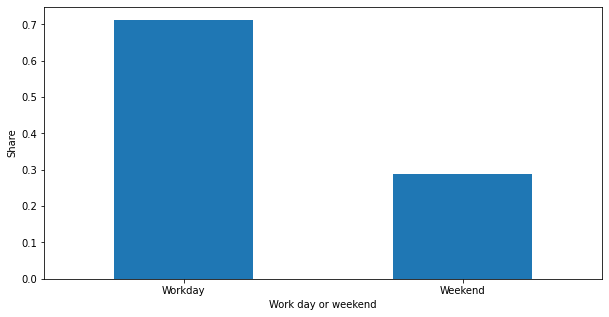

In [30]:
df['work_weekend'].value_counts(normalize = True).plot.bar(figsize=(10,5))
plt.xticks(rotation = 0);
plt.xlabel('Work day or weekend');
plt.ylabel('Share');

Наблюдение: наобольшее количество поездок было совершено вечером

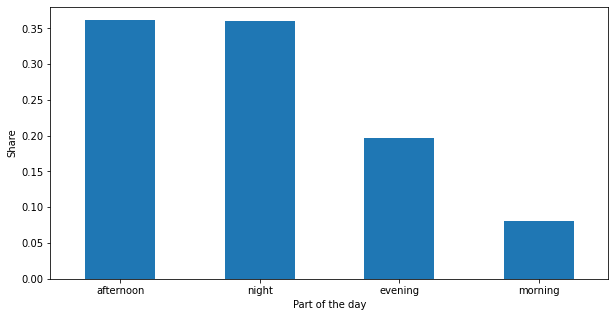

In [31]:
df['part_of_the_day'].value_counts(normalize = True).plot.bar(figsize=(10,5))
plt.xticks(rotation = 0);
plt.xlabel('Part of the day');
plt.ylabel('Share');

Наблюдение: наибольшее количество поездок было совершено в вечернее время, наименьшее -- ранним утром до 7:00 

# Выявление зависимости между признаками 

C:\Users\Daniil\AppData\Local\Temp/ipykernel_21344/2669204036.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True, cmap='coolwarm');


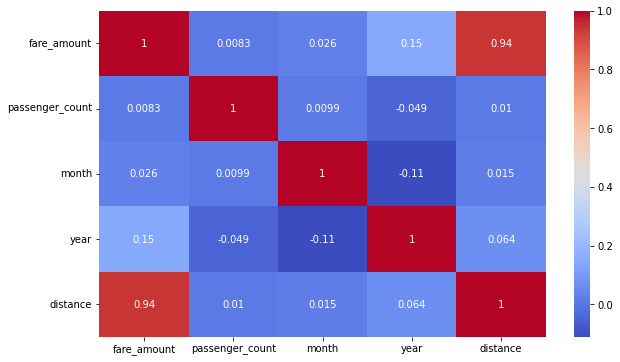

In [32]:
fig,axis = plt.subplots(figsize = (10,6))
sns.heatmap(df.corr(),annot = True, cmap='coolwarm');

Как видно из представленной тепловой карты, наибольшую корреляцию имеют столбцы **fare_amount** и **distance**.
Для дальнейшего прогнозирования стоимости поездки отделим столбец **fare_amount** и разделим данные на тестовую и тренировочную выборки, предварительно нормализовав все столбцы признаков, кроме целевого. 

## Применим LabelEncoding 

In [33]:
from sklearn.preprocessing import LabelEncoder
labelencoder_day = LabelEncoder()
df.part_of_the_day = labelencoder_day.fit_transform(df.part_of_the_day)

labelencoder_work = LabelEncoder()
df.work_weekend = labelencoder_work.fit_transform(df.work_weekend)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()


df.iloc[: , 1:] = scaler.fit_transform(df.iloc[: , 1:])
df

C:\Users\Daniil\AppData\Local\Temp/ipykernel_21344/1456428620.py:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[: , 1:] = scaler.fit_transform(df.iloc[: , 1:])


,fare_amount,passenger_count,month,year,work_weekend,part_of_the_day,distance
0,7.5,0.00,0.363636,1.000000,1.0,1.000000,0.021013
1,7.7,0.00,0.545455,0.000000,1.0,1.000000,0.033918
2,12.9,0.00,0.636364,0.000000,1.0,1.000000,0.076605
3,5.3,0.50,0.454545,0.000000,1.0,0.000000,0.020682
4,16.0,1.00,0.636364,0.833333,1.0,0.333333,0.067340
...,...,...,...,...,...,...,...
199993,9.5,0.00,0.727273,0.500000,0.0,1.000000,0.036896
199996,7.5,0.00,0.181818,0.833333,1.0,1.000000,0.024322
199997,30.9,0.25,0.454545,0.000000,1.0,1.000000,0.205824
199998,14.5,0.00,0.363636,1.000000,1.0,0.000000,0.051787


In [35]:
# dividing the dataset into feature and target values 
y = df['fare_amount']
x = df.drop(['fare_amount'], axis=1)

# dividing the dataset into training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=RSEED)

## Тест: Линейная регрессия

In [36]:
from sklearn.linear_model import LinearRegression
# обучение модели
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

y_pred = linear_model.predict(x_test)

linear_model.score(x_test, y_test)

0.904696712503816

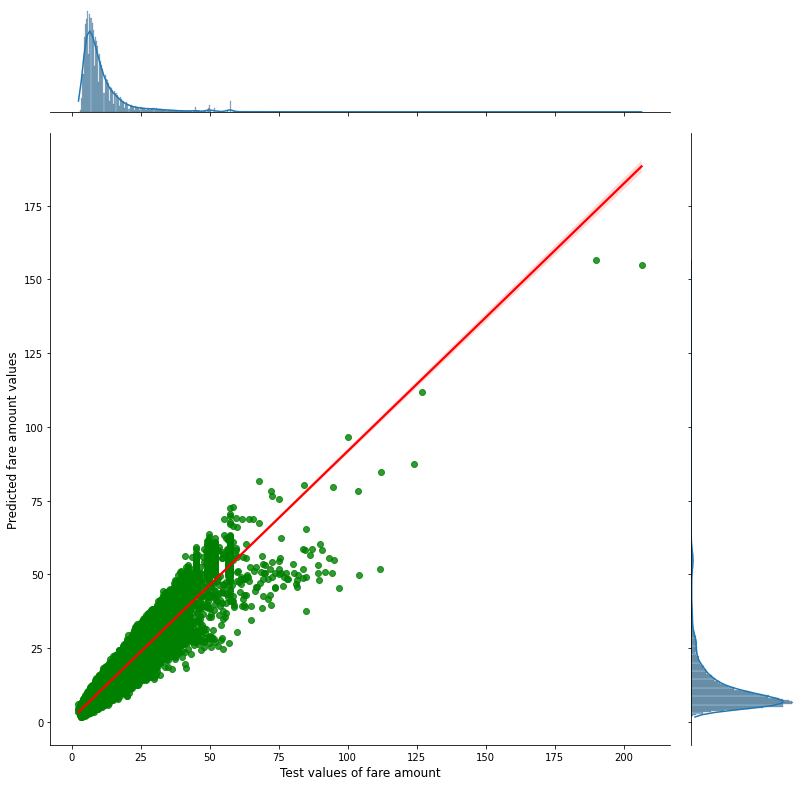

In [38]:
h = sns.jointplot(x=y_test, y=y_pred, kind="reg", joint_kws={'color':'green'}, 
                  line_kws={"color": "red"}, height=11)
h.set_axis_labels('Test values of fare amount', 'Predicted fare amount values', fontsize=12)
